In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras 
import seaborn as sns
from PIL import Image
import matplotlib.image as mpimg
import cv2

### Displaying number of images

In [2]:
import os
path,dir,files = next(os.walk('Soil types'))
file_count = len(files)
print("Number of images: ",file_count)

Number of images:  312


#### Displaying the input image sample classes

Black Soil: 


Yellow Soil: 


Cinder Soil: 


Laterite Soil: 


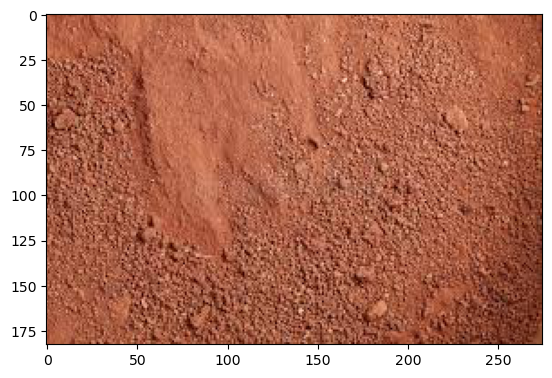

Peat Soil: 


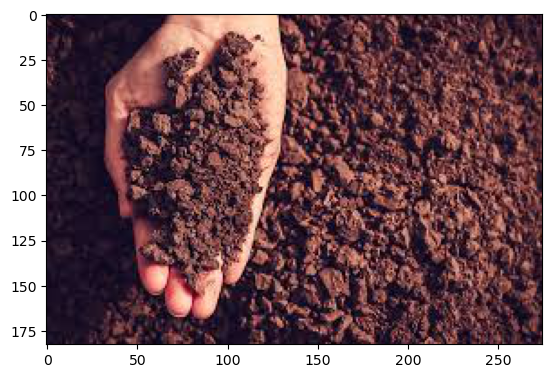

In [3]:
print("Black Soil: ")
img = mpimg.imread(r'Soil types/Black_Soil_ (11).jpg')
imgplot = plt.imshow(img)
plt.show()
print("Yellow Soil: ")
img = mpimg.imread(r'Soil types/Yellow_Soil_ (1).jpg')
imgplot = plt.imshow(img)
plt.show()
print("Cinder Soil: ")
img = mpimg.imread(r'Soil types/Cinder_Soil_ (1).jpg')
imgplot = plt.imshow(img)
plt.show()
print("Laterite Soil: ")
img = mpimg.imread(r'Soil types/Laterite_Soil_ (1).jpg')
imgplot = plt.imshow(img)
plt.show()
print("Peat Soil: ")
img = mpimg.imread(r'Soil types/Peat_Soil_ (1).jpg')
imgplot = plt.imshow(img)
plt.show()

### Saving the dataset

In [4]:
filenames = os.listdir('Soil types')
print(filenames[0], filenames[78])

Black_Soil_ (34).jpg Yellow_Soil_ (8).jpg


In [5]:
black = []
cinder = []
laterite = []
peat = []
yellow = []
for files in filenames:
    if files[0:5] == 'Black':
        black.append(files)
    elif files[0:6] == 'Cinder':
        cinder.append(files)
    elif files[0:8] == 'Laterite':
        laterite.append(files)
    elif files[0:4] == 'Peat':
        peat.append(files)
    elif files[0:6] == 'Yellow':
        yellow.append(files)
print(len(black),len(cinder),len(laterite),len(peat),len(yellow))

74 60 60 60 58


### Resizing and storing the images

In [8]:
# creating a new directory for resized images
os.mkdir('images_resized1')
original_path = 'Soil types'
new_path = 'images_resized1/'

In [9]:
print(len(filenames))
for i in filenames:
    #print(i)
    filename = i
    #print(filename)
    f_img = path+"/"+filename
    img = Image.open(f_img)
    img = img.resize((224, 224)) #(width, height)
    img = img.convert('RGB')
    new_img_path = new_path+filename
    img.save(new_img_path)  # saving the resized file

313


IsADirectoryError: [Errno 21] Is a directory: 'Soil types/.ipynb_checkpoints'

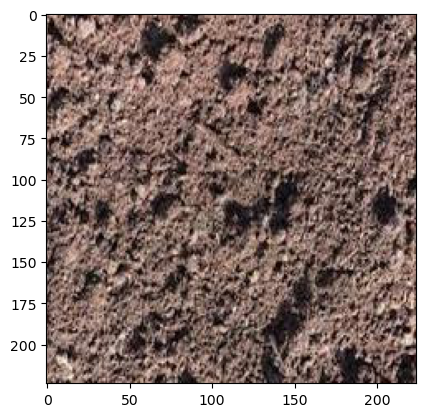

In [11]:
img = mpimg.imread(r'images_resized1/Black_Soil_ (1).jpg')
imgplot = plt.imshow(img)
plt.show()

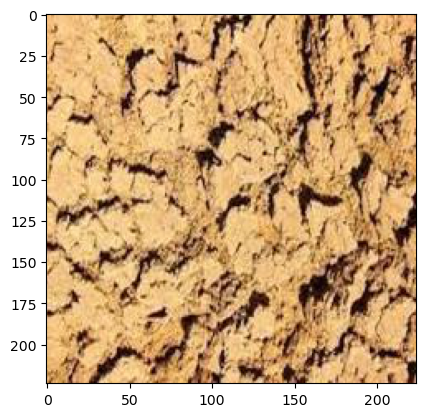

In [12]:
img = mpimg.imread(r'images_resized1/Yellow_Soil_ (40).jpg')
imgplot = plt.imshow(img)
plt.show()

In [13]:
import glob # function that's used to search for files that match a specific file pattern or name

In [17]:
image_directory = 'images_resized1/'
image_extensions = ['png','jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extensions]
soil_images = np.asarray([cv2.imread(file) for file in files])

In [18]:
soil_images.shape

(244, 224, 224, 3)

In [20]:
filenames = os.listdir('images_resized1/')

In [21]:
labels = []
for i in range(0,len(filenames)):
    files = filenames[i]    
    if files[0:5] == 'Black':
        labels.append(0)
    elif files[0:6] == 'Cinder':
        labels.append(1)
    elif files[0:8] == 'Laterite':
        labels.append(2)
    elif files[0:4] == 'Peat':
        labels.append(3)
    elif files[0:6] == 'Yellow':
        labels.append(4)

In [22]:
labels.count(0), labels.count(1),labels.count(2), labels.count(3),labels.count(4)

(60, 48, 48, 47, 41)

In [23]:
X = soil_images
Y = np.asarray(labels)

In [24]:
Y

array([0, 2, 4, 0, 0, 2, 4, 2, 0, 1, 2, 4, 3, 0, 3, 1, 2, 0, 3, 1, 1, 3,
       0, 0, 2, 3, 1, 3, 4, 1, 3, 2, 4, 0, 4, 2, 1, 2, 0, 4, 3, 1, 0, 0,
       4, 3, 1, 2, 0, 1, 2, 4, 0, 4, 1, 3, 2, 4, 1, 3, 0, 2, 3, 0, 1, 3,
       3, 1, 0, 2, 3, 1, 0, 1, 2, 4, 3, 0, 4, 0, 2, 0, 0, 2, 4, 0, 2, 1,
       3, 2, 0, 0, 1, 3, 4, 2, 1, 3, 0, 3, 4, 1, 0, 4, 2, 1, 2, 0, 4, 0,
       0, 2, 1, 3, 4, 0, 2, 0, 2, 1, 3, 0, 4, 2, 3, 1, 2, 0, 3, 1, 3, 1,
       0, 2, 3, 1, 4, 2, 0, 1, 3, 0, 2, 0, 2, 1, 3, 4, 0, 2, 0, 4, 2, 0,
       2, 4, 0, 3, 4, 1, 0, 1, 3, 4, 2, 1, 3, 0, 0, 3, 2, 1, 3, 0, 4, 0,
       2, 1, 2, 4, 0, 4, 3, 1, 4, 3, 1, 3, 4, 3, 1, 1, 3, 1, 1, 4, 3, 2,
       4, 0, 2, 0, 2, 0, 4, 2, 0, 2, 0, 4, 2, 0, 2, 0, 0, 4, 1, 4, 3, 3,
       1, 3, 4, 3, 1, 3, 0, 3, 1, 3, 1, 4, 0, 4, 2, 1, 0, 2, 4, 0, 2, 1,
       3, 1])

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=35,stratify=Y)

In [26]:
Y_train.shape,Y_test.shape

((195,), (49,))

In [27]:
X_train_scaled = X_train/255

In [28]:
X_test_scaled = X_test/255

In [29]:
pip install tensorflow_hub

Note: you may need to restart the kernel to use updated packages.


In [30]:
import tensorflow_hub as hub

In [31]:
mobile_net_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobile_net_model,input_shape=(224,224,3),trainable=False)

In [32]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [33]:
number_of_classes = 5

model = Sequential()

model.add(pretrained_model)

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))

model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 4227141 (16.13 MB)
Trainable params: 19691

In [34]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [35]:
history = model.fit(X_train_scaled,Y_train,epochs=20,validation_split=0.25,batch_size=16)

Epoch 1/20


/Users/devipriyasozharajan/anaconda3/lib/python3.11/site-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


10/10 [==============================] - 3s 155ms/step - loss: 1.4597 - acc: 0.4178 - val_loss: 1.6931 - val_acc: 0.4286
Epoch 2/20
10/10 [==============================] - 1s 112ms/step - loss: 0.6210 - acc: 0.7740 - val_loss: 1.2823 - val_acc: 0.5510
Epoch 3/20
10/10 [==============================] - 1s 107ms/step - loss: 0.2800 - acc: 0.8904 - val_loss: 0.9212 - val_acc: 0.7143
Epoch 4/20
10/10 [==============================] - 1s 106ms/step - loss: 0.2338 - acc: 0.9315 - val_loss: 1.9940 - val_acc: 0.6939
Epoch 5/20
10/10 [==============================] - 1s 105ms/step - loss: 0.2221 - acc: 0.9247 - val_loss: 1.0915 - val_acc: 0.6531
Epoch 6/20
10/10 [==============================] - 1s 112ms/step - loss: 0.0308 - acc: 0.9932 - val_loss: 1.0929 - val_acc: 0.7143
Epoch 7/20
10/10 [==============================] - 1s 106ms/step - loss: 0.0367 - acc: 0.9863 - val_loss: 1.1100 - val_acc: 0.6939
Epoch 8/20
10/10 [==============================] - 1s 106ms/step - loss: 0.0311 - acc:

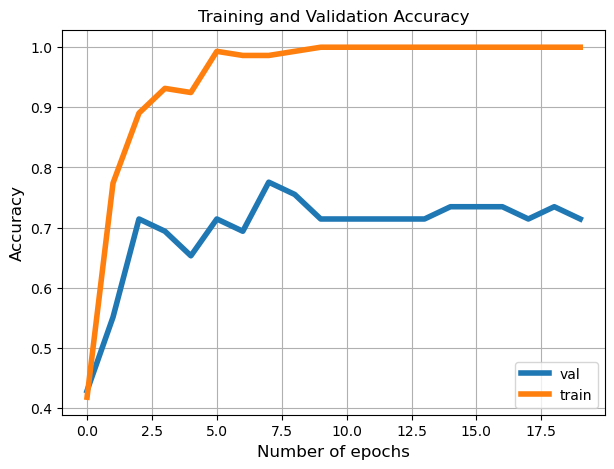

In [36]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_acc'],linewidth = 4)
plt.plot(history.history['acc'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

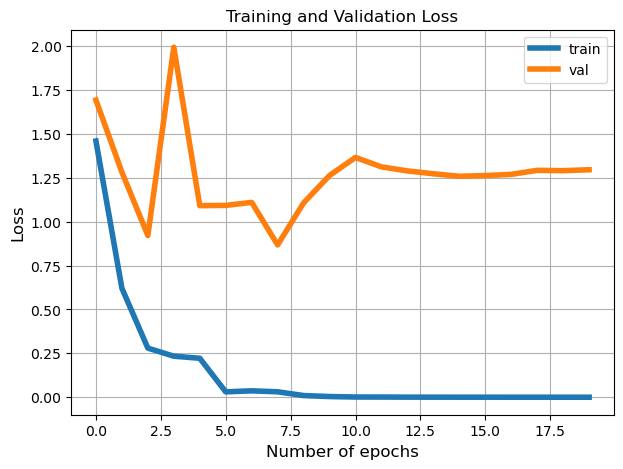

In [37]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()
plt.show()


In [38]:
score,acc = model.evaluate(X_test_scaled,Y_test)
print("Test Loss = ",score)
print("Test Acc = ",acc)

2/2 [==============================] - 0s 96ms/step - loss: 0.5238 - acc: 0.8776
Test Loss =  0.5237717032432556
Test Acc =  0.8775510191917419


1/1 [==============================] - 0s 271ms/step
0
Black Soil


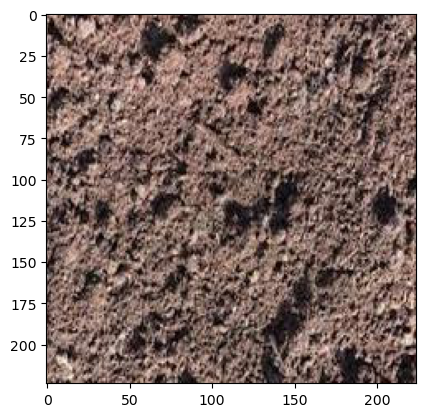

In [39]:
img_test = cv2.imread(r'images_resized1/Black_Soil_ (1).jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'images_resized1/Black_Soil_ (1).jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Black Soil")
elif input_label == 1:
    print("Cinder Soil")
elif input_label == 2:
    print("Laterite Soil")
elif input_label == 3:
    print("Peat Soil")
elif input_label == 4:
    print("Yellow Soil")

1/1 [==============================] - 0s 94ms/step
4
Yellow Soil


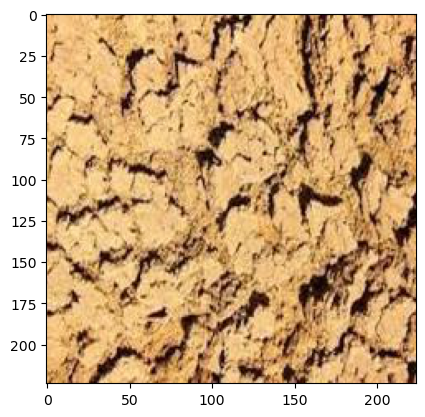

In [44]:
img_test = cv2.imread(r'Soil types/Yellow_Soil_ (40).jpg')
plt.imshow(mpimg.imread(r'Soil types/Yellow_Soil_ (40).jpg'))
img_resize = cv2.resize(img_test,(224,224))
#plt.imshow(mpimg.imread(r'Soil types/Yellow_Soil_ (40).jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Black Soil")
elif input_label == 1:
    print("Cinder Soil")
elif input_label == 2:
    print("Laterite Soil")
elif input_label == 3:
    print("Peat Soil")
elif input_label == 4:
    print("Yellow Soil")

In [45]:
f_img = 'test/cinder_soil_test.jpg'
img = Image.open(f_img)
img = img.resize((224, 224)) #(width, height)
img = img.convert('RGB')
new_img_path = 'images_resized1/'+'cinder_soil_test.jpg'
img.save(new_img_path)

#plt.imshow(mpimg.imread(r'images_resized/laterite.jpg')

1/1 [==============================] - 0s 25ms/step
1
Cinder Soil - used for growing Strawberries, tomatoes, eggplants, pepper, cucumber, spinach


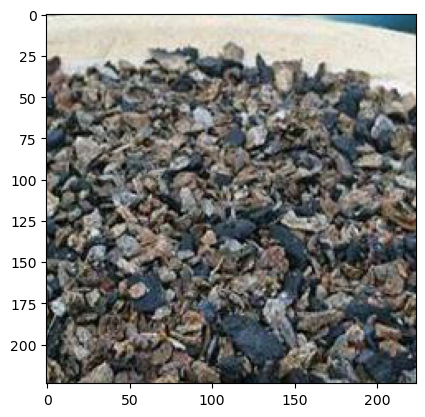

In [46]:
img_test = cv2.imread(r'images_resized1/cinder_soil_test.jpg')
plt.imshow(mpimg.imread(r'images_resized1/cinder_soil_test.jpg'))
img_resize = cv2.resize(img_test,(224,224))
#plt.imshow(mpimg.imread(r'Soil types/Yellow_Soil_ (40).jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Black Soil - used for growing cotton, sugarcane, tobacco, wheat, millets, and oilseeds")
elif input_label == 1:
    print("Cinder Soil - used for growing Strawberries, tomatoes, eggplants, pepper, cucumber, spinach")
elif input_label == 2:
    print("Laterite Soil - used for growing tea, coffee, rubber, cinchona, coconut, areca nut")
elif input_label == 3:
    print("Peat Soil - used for growing potatoes, sugar beets, lettuce, onions, carrots, celery, plus commercial garden crops.")
elif input_label == 4:
    print("Yellow Soil - used for growing maize, groundnut, rice, fruits like mango, orange, vegetables, potato, and pulses")

In [ ]:
img_test = cv2.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\test\yellow soil.jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\test\yellow soil.jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Black Soil")
elif input_label == 1:
    print("Cinder Soil")
elif input_label == 2:
    print("Laterite Soil")
elif input_label == 3:
    print("Peat Soil")
elif input_label == 4:
    print("Yellow Soil")

In [ ]:
img_test = cv2.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\test\peat soil.jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\test\peat soil.jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Black Soil")
elif input_label == 1:
    print("Cinder Soil")
elif input_label == 2:
    print("Laterite Soil")
elif input_label == 3:
    print("Peat Soil")
elif input_label == 4:
    print("Yellow Soil")

In [ ]:
# model.save('my_model.h5')